<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="nematoda"
dataset = 3
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

         X0     X1      X2     X3     X4     X5     X6     X7     X8      X9  \
0     6.158  5.083   4.399  7.234  1.466  8.798  4.985  2.639  2.053   5.767   
1     6.406  8.541   2.491  4.270  1.423  4.982  1.779  5.338  2.847   9.609   
2     6.435  6.178   5.920  5.148  1.544  7.979  5.534  4.891  3.089   6.306   
3     4.255  9.574   4.255  6.383  0.000  9.574  5.319  3.191  0.000   5.319   
4     3.200  4.800  10.400  3.200  4.000  4.800  6.400  5.600  1.600  11.200   
..      ...    ...     ...    ...    ...    ...    ...    ...    ...     ...   
995  10.236  3.150   0.787  1.575  3.937  7.087  4.724  6.299  3.937   5.512   
996   2.041  9.184   5.102  4.082  6.122  5.102  1.020  3.061  1.020   9.184   
997   5.966  3.835   6.108  3.267  1.136  4.688  7.244  8.239  3.835   5.398   
998   5.389  3.593   2.395  4.790  7.186  3.593  3.593  6.587  2.395   3.593 

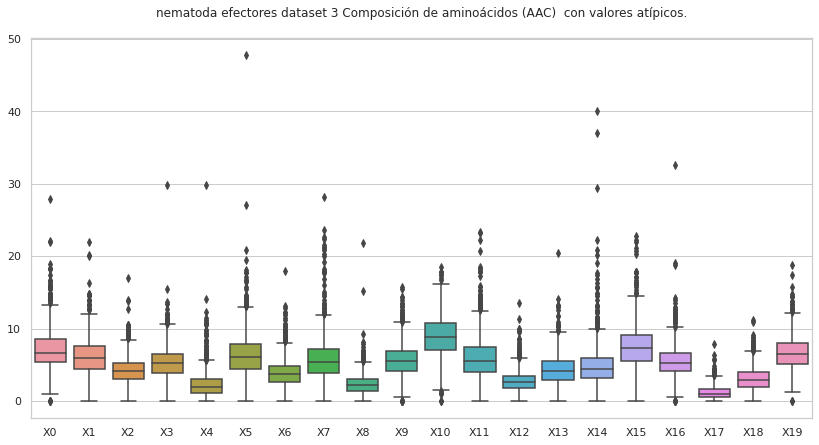

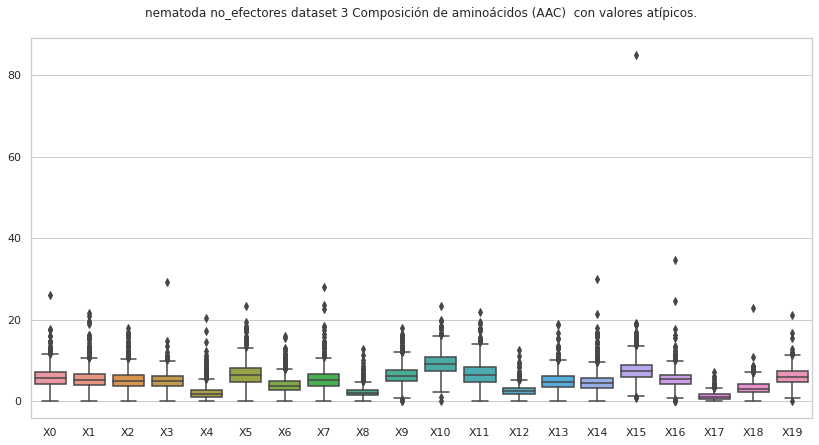

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

         X0     X1     X2     X3     X4      X5     X6     X7     X8     X9  \
0     6.158  5.083  4.399  7.234  1.466   8.798  4.985  2.639  2.053  5.767   
1     6.406  8.541  2.491  4.270  1.423   4.982  1.779  5.338  2.847  9.609   
2     6.435  6.178  5.920  5.148  1.544   7.979  5.534  4.891  3.089  6.306   
3     4.255  9.574  4.255  6.383  0.000   9.574  5.319  3.191  0.000  5.319   
5     9.050  9.050  2.715  2.262  1.810  12.217  4.977  2.715  3.167  6.787   
..      ...    ...    ...    ...    ...     ...    ...    ...    ...    ...   
995  10.236  3.150  0.787  1.575  3.937   7.087  4.724  6.299  3.937  5.512   
996   2.041  9.184  5.102  4.082  6.122   5.102  1.020  3.061  1.020  9.184   
997   5.966  3.835  6.108  3.267  1.136   4.688  7.244  8.239  3.835  5.398   
998   5.389  3.593  2.395  4.790  7.186   3.593  3.593  6.587  2.395  3.593   
999   4.

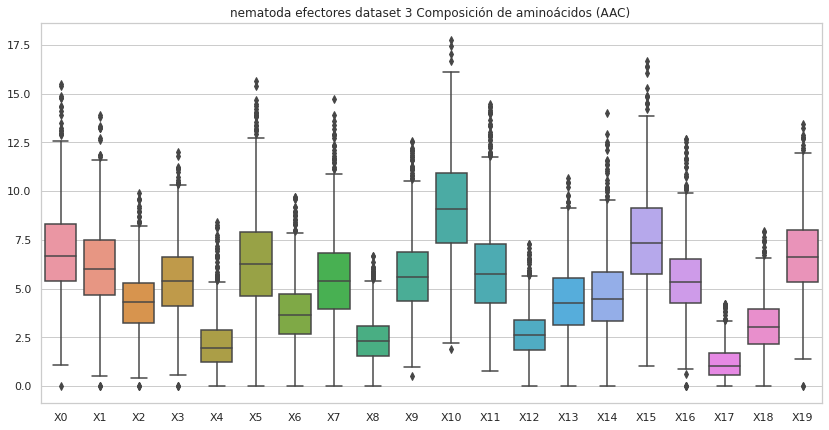

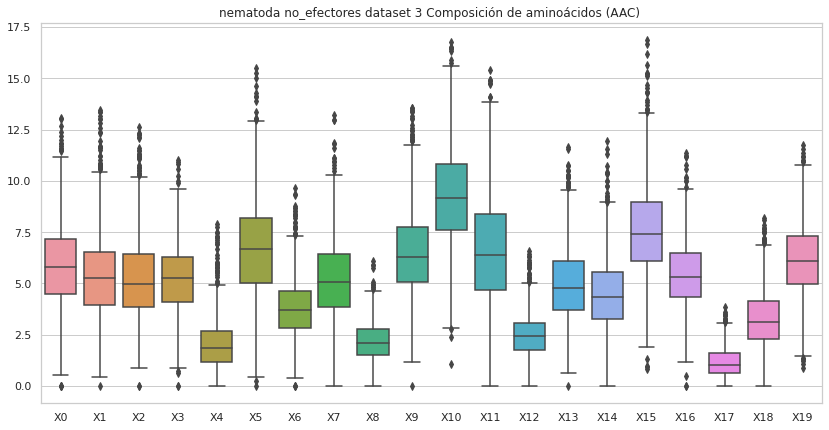

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.023907  0.005692  0.028081  0.034152  0.012902  0.010246  0.007969   
1    0.019405  0.004312  0.012936  0.015093  0.018327  0.016171  0.008624   
2    0.040165  0.009640  0.032132  0.049805  0.032935  0.030526  0.019279   
3    0.028460  0.000000  0.042691  0.064036  0.028460  0.021345  0.000000   
4    0.032758  0.040948  0.032758  0.049137  0.065516  0.057327  0.016379   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.046365  0.017833  0.007133  0.032099  0.017833  0.028532  0.017833   
996  0.028307  0.084920  0.056613  0.070767  0.084920  0.042460  0.014153   
997  0.027903  0.005315  0.015280  0.021924  0.017938  0.038533  0.017938   
998  0.029072  0.038763  0.025842  0.019382  0.022612  0.035533  0.012921   
999  0.0

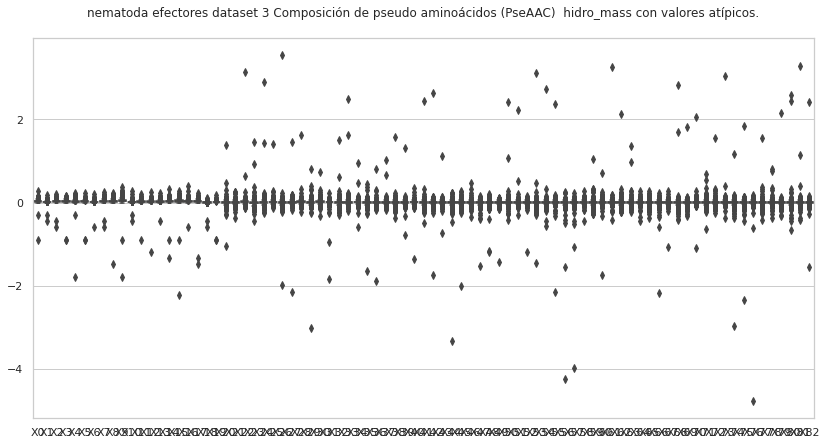

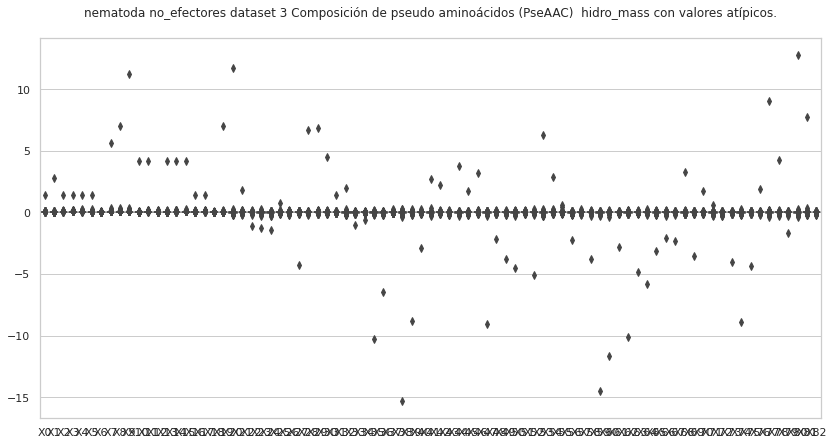

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.023907  0.005692  0.028081  0.034152  0.012902  0.010246  0.007969   
1    0.019405  0.004312  0.012936  0.015093  0.018327  0.016171  0.008624   
2    0.040165  0.009640  0.032132  0.049805  0.032935  0.030526  0.019279   
3    0.028460  0.000000  0.042691  0.064036  0.028460  0.021345  0.000000   
4    0.032758  0.040948  0.032758  0.049137  0.065516  0.057327  0.016379   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.047835  0.015945  0.039862  0.043848  0.047835  0.059793  0.023917   
995  0.046365  0.017833  0.007133  0.032099  0.017833  0.028532  0.017833   
997  0.027903  0.005315  0.015280  0.021924  0.017938  0.038533  0.017938   
998  0.029072  0.038763  0.025842  0.019382  0.022612  0.035533  0.012921   
999  0.0

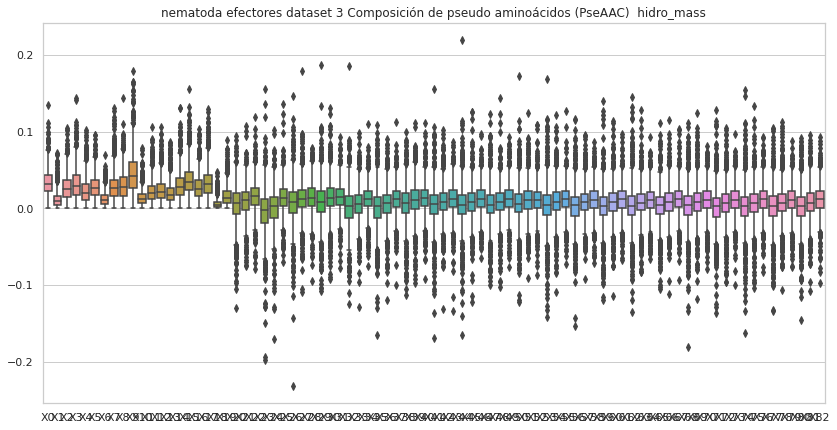

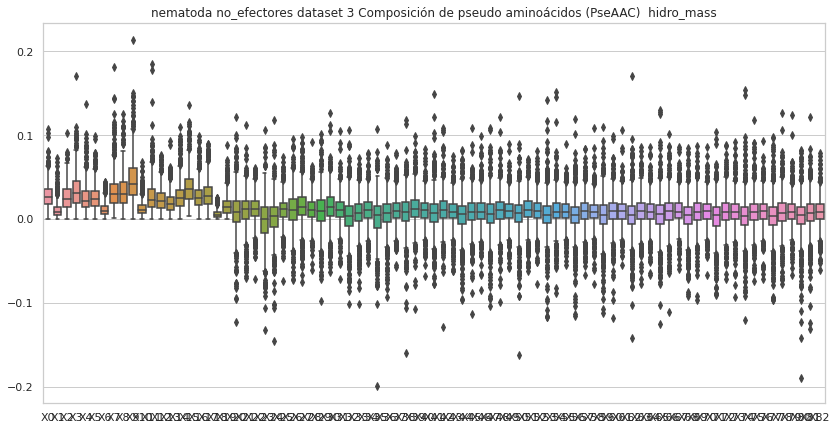

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.047290  0.011260  0.055547  0.067558  0.025522  0.020267  0.015763   
1    0.052683  0.011707  0.035122  0.040976  0.049756  0.043902  0.023415   
2    0.051306  0.012313  0.041045  0.063619  0.042071  0.038992  0.024627   
3    0.049935  0.000000  0.074903  0.112355  0.049935  0.037452  0.000000   
4    0.028906  0.036133  0.028906  0.043360  0.057813  0.050586  0.014453   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.043197  0.016614  0.006646  0.029906  0.016614  0.026583  0.016614   
996  0.017802  0.053407  0.035604  0.044506  0.053407  0.026703  0.008901   
997  0.028573  0.005442  0.015647  0.022450  0.018368  0.039458  0.018368   
998  0.029701  0.039602  0.026401  0.019801  0.023101  0.036302  0.013201   
999  0.029900 

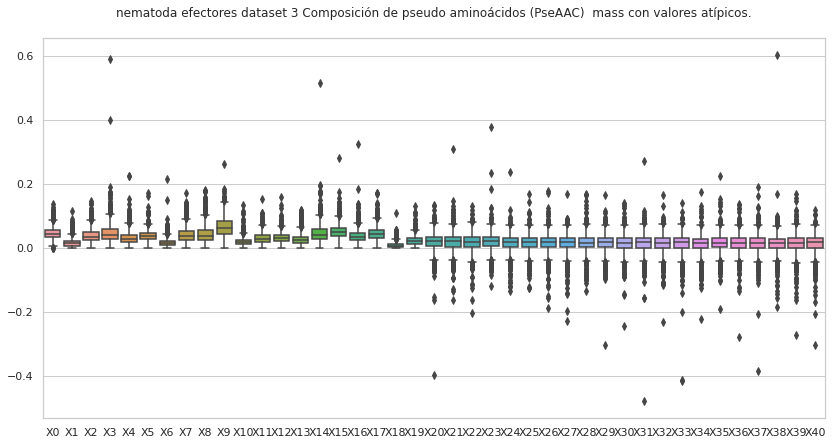

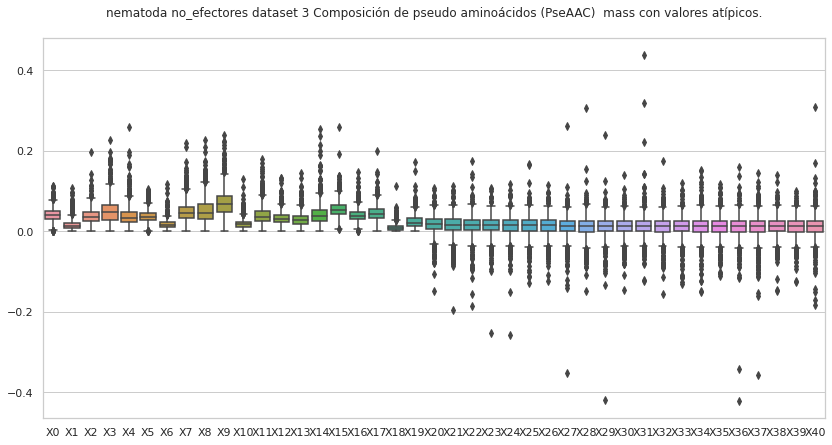

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.047290  0.011260  0.055547  0.067558  0.025522  0.020267  0.015763   
1    0.052683  0.011707  0.035122  0.040976  0.049756  0.043902  0.023415   
2    0.051306  0.012313  0.041045  0.063619  0.042071  0.038992  0.024627   
5    0.062078  0.012416  0.015519  0.083805  0.037247  0.018623  0.021727   
6    0.047756  0.017056  0.057990  0.051168  0.044345  0.047756  0.017056   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.043197  0.016614  0.006646  0.029906  0.016614  0.026583  0.016614   
996  0.017802  0.053407  0.035604  0.044506  0.053407  0.026703  0.008901   
997  0.028573  0.005442  0.015647  0.022450  0.018368  0.039458  0.018368   
998  0.029701  0.039602  0.026401  0.019801  0.023101  0.036302  0.013201   
999  0.029900  0.014950 

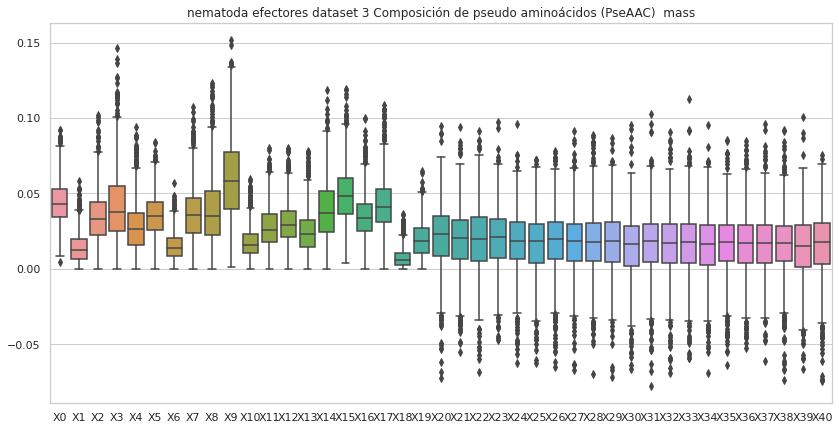

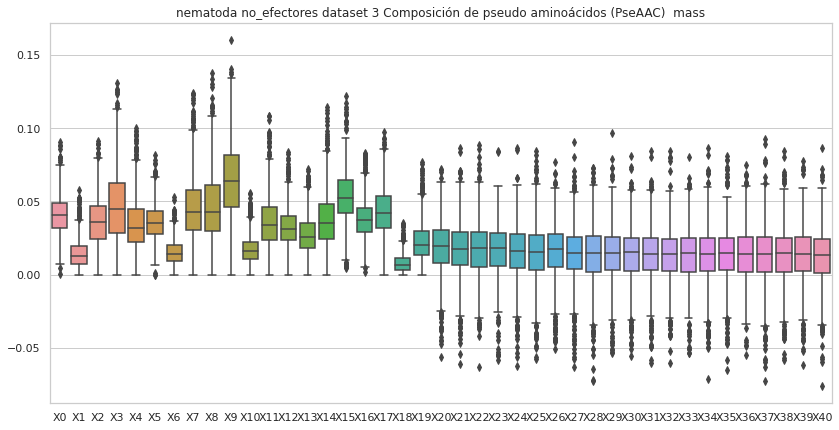

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.027084  0.006449  0.031813  0.038692  0.014617  0.011608  0.009028   
1    0.020763  0.004614  0.013842  0.016149  0.019609  0.017302  0.009228   
2    0.047741  0.011458  0.038193  0.059199  0.039148  0.036283  0.022916   
3    0.025900  0.000000  0.038849  0.058274  0.025900  0.019425  0.000000   
4    0.036789  0.045986  0.036789  0.055183  0.073577  0.064380  0.018394   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.122134  0.046975  0.018790  0.084554  0.046975  0.075159  0.046975   
996  0.035518  0.106554  0.071036  0.088795  0.106554  0.053277  0.017759   
997  0.056813  0.010821  0.031112  0.044638  0.036522  0.078455  0.036522   
998  0.051857  0.069143  0.046095  0.034571  0.040333  0.063381  0.023048   
999  0.041174

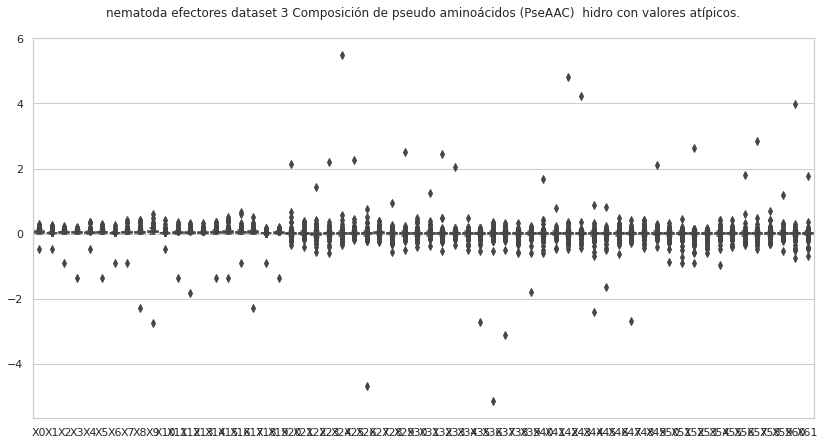

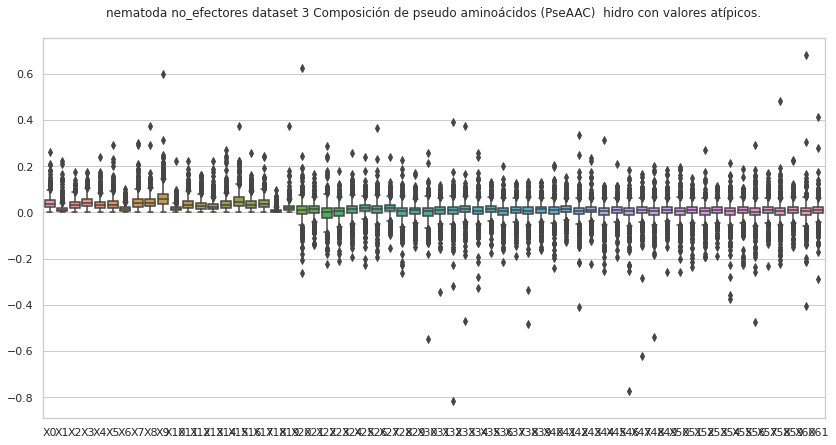

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.027084  0.006449  0.031813  0.038692  0.014617  0.011608  0.009028   
1    0.020763  0.004614  0.013842  0.016149  0.019609  0.017302  0.009228   
2    0.047741  0.011458  0.038193  0.059199  0.039148  0.036283  0.022916   
3    0.025900  0.000000  0.038849  0.058274  0.025900  0.019425  0.000000   
4    0.036789  0.045986  0.036789  0.055183  0.073577  0.064380  0.018394   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.076119  0.025373  0.063433  0.069776  0.076119  0.095149  0.038060   
995  0.122134  0.046975  0.018790  0.084554  0.046975  0.075159  0.046975   
997  0.056813  0.010821  0.031112  0.044638  0.036522  0.078455  0.036522   
998  0.051857  0.069143  0.046095  0.034571  0.040333  0.063381  0.023048   
999  0.041174  0.02

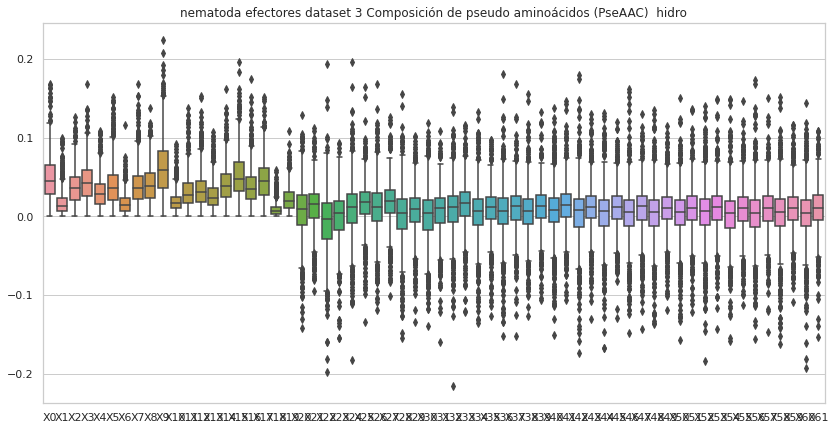

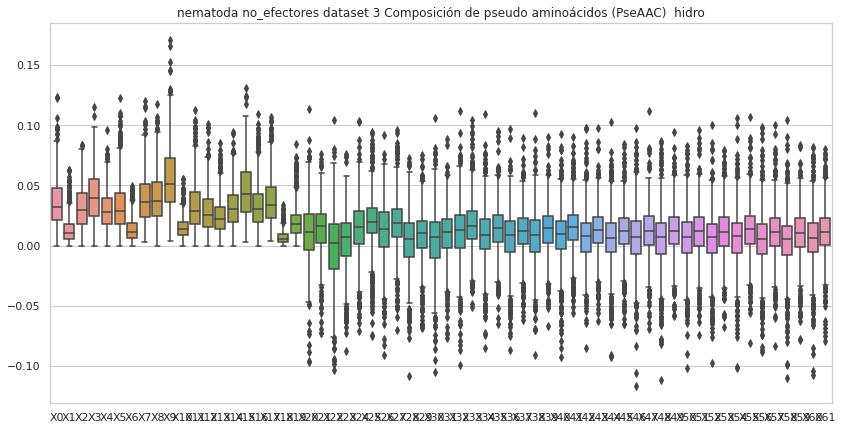

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.079293  0.063434  0.048679  0.005100  0.005796 -0.021472 -0.003543   
1    0.062142  0.000370 -0.000905  0.014367  0.001473  0.160242  0.116996   
2    0.071002  0.080575  0.018343 -0.046646  0.022020 -0.029680  0.055163   
3    0.148351  0.033734 -0.035410  0.023460 -0.148762 -0.087082 -0.118124   
4    0.130044  0.121923  0.021932  0.078560  0.055482  0.117875  0.067911   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.041904 -0.018839  0.094401 -0.046842  0.080568 -0.062324  0.056777   
996 -0.166697  0.173928  0.003227  0.156165 -0.077882  0.004215  0.023281   
997  0.010353  0.021485  0.067200  0.028902  0.023099 -0.011267  0.018219   
998  0.018160 -0.020017  0.037025  0.003775  0.130536 -0.071240 -0.116582   
999 -0.017526 

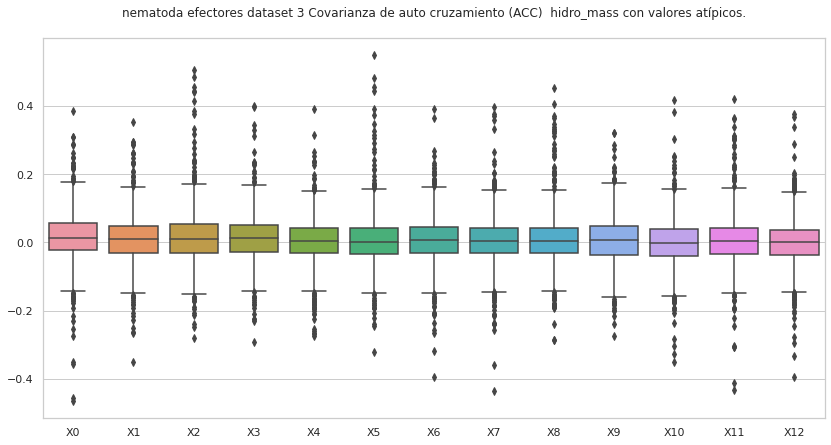

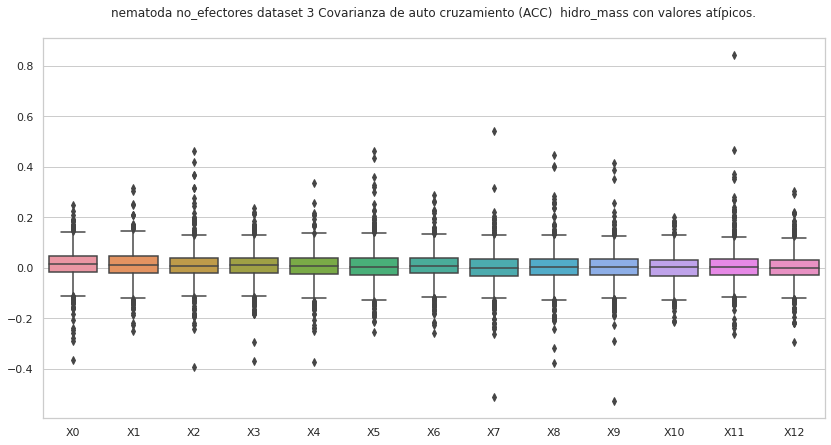

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.079293  0.063434  0.048679  0.005100  0.005796 -0.021472 -0.003543   
1    0.062142  0.000370 -0.000905  0.014367  0.001473  0.160242  0.116996   
2    0.071002  0.080575  0.018343 -0.046646  0.022020 -0.029680  0.055163   
4    0.130044  0.121923  0.021932  0.078560  0.055482  0.117875  0.067911   
5    0.097107  0.021204 -0.048569 -0.033159  0.045475  0.067008  0.044175   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.041904 -0.018839  0.094401 -0.046842  0.080568 -0.062324  0.056777   
996 -0.166697  0.173928  0.003227  0.156165 -0.077882  0.004215  0.023281   
997  0.010353  0.021485  0.067200  0.028902  0.023099 -0.011267  0.018219   
998  0.018160 -0.020017  0.037025  0.003775  0.130536 -0.071240 -0.116582   
999 -0.017526 

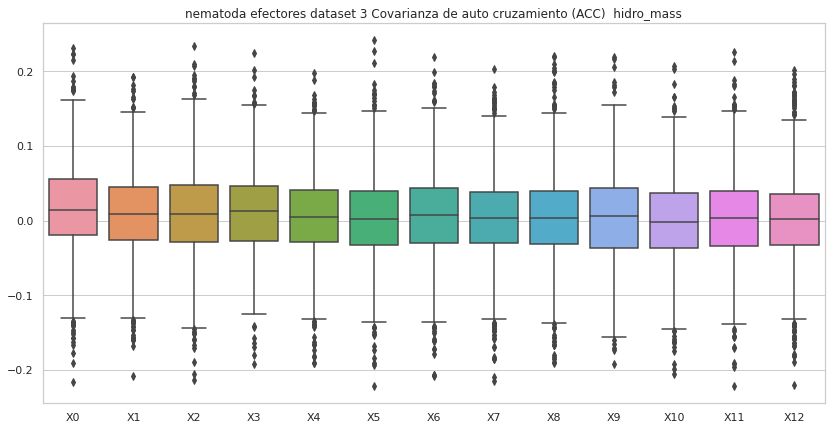

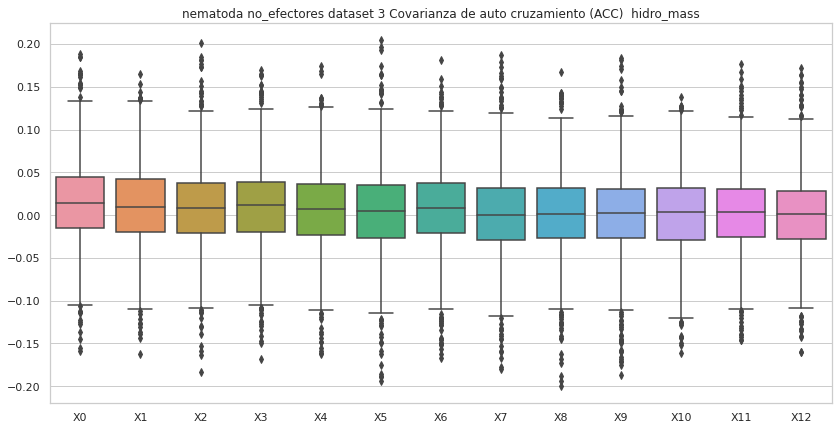

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.079293  0.063434  0.048679  0.005100  0.005796 -0.021472 -0.003543   
1    0.062142  0.000370 -0.000905  0.014367  0.001473  0.160242  0.116996   
2    0.071002  0.080575  0.018343 -0.046646  0.022020 -0.029680  0.055163   
3    0.148351  0.033734 -0.035410  0.023460 -0.148762 -0.087082 -0.118124   
4    0.130044  0.121923  0.021932  0.078560  0.055482  0.117875  0.067911   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.041904 -0.018839  0.094401 -0.046842  0.080568 -0.062324  0.056777   
996 -0.166697  0.173928  0.003227  0.156165 -0.077882  0.004215  0.023281   
997  0.010353  0.021485  0.067200  0.028902  0.023099 -0.011267  0.018219   
998  0.018160 -0.020017  0.037025  0.003775  0.130536 -0.071240 -0.116582   
999 -0.017526 -0.015

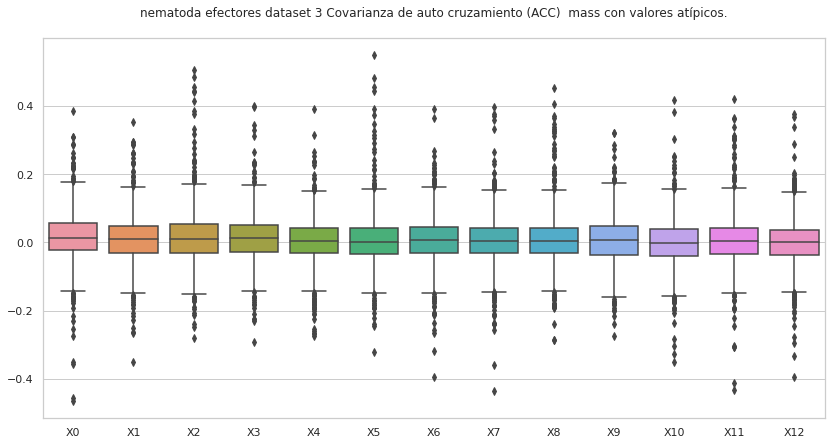

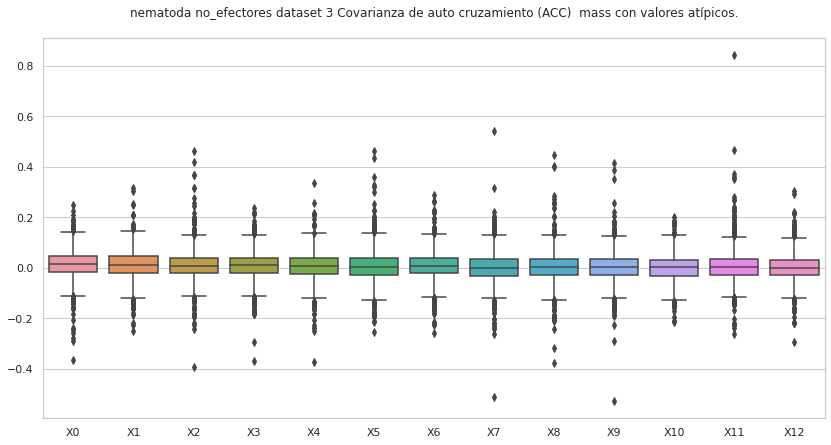

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.079293  0.063434  0.048679  0.005100  0.005796 -0.021472 -0.003543   
1    0.062142  0.000370 -0.000905  0.014367  0.001473  0.160242  0.116996   
2    0.071002  0.080575  0.018343 -0.046646  0.022020 -0.029680  0.055163   
4    0.130044  0.121923  0.021932  0.078560  0.055482  0.117875  0.067911   
5    0.097107  0.021204 -0.048569 -0.033159  0.045475  0.067008  0.044175   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.041904 -0.018839  0.094401 -0.046842  0.080568 -0.062324  0.056777   
996 -0.166697  0.173928  0.003227  0.156165 -0.077882  0.004215  0.023281   
997  0.010353  0.021485  0.067200  0.028902  0.023099 -0.011267  0.018219   
998  0.018160 -0.020017  0.037025  0.003775  0.130536 -0.071240 -0.116582   
999 -0.017526 -0.015652 -0.032

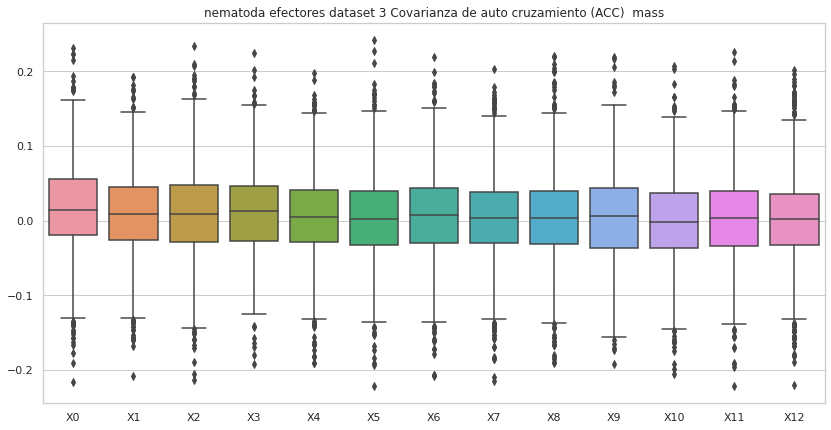

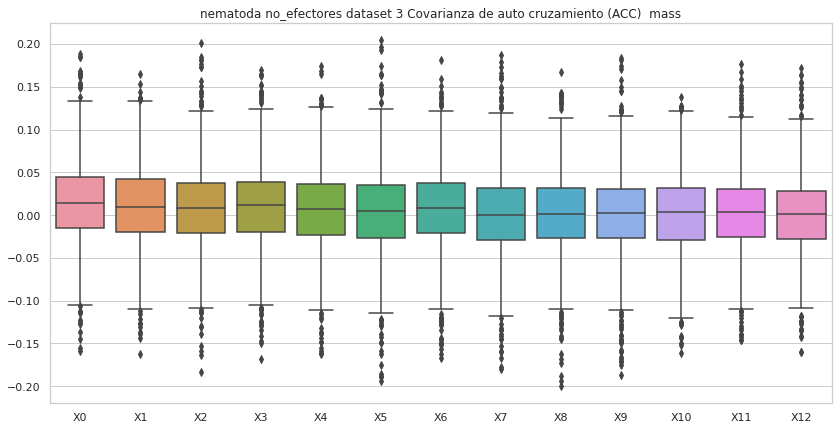

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores nematoda dataset 3, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.022621 -0.054573 -0.024733  0.021480  0.041785  0.119181 -0.028403   
1    0.109106  0.006863  0.093888  0.135450  0.091751 -0.033773  0.073244   
2   -0.078946 -0.071251 -0.036030  0.100100 -0.010995  0.006796  0.020599   
3   -0.007631 -0.064787  0.074098 -0.121072 -0.165068  0.017188 -0.160806   
4   -0.092814 -0.009529 -0.091094  0.101692 -0.070141 -0.100347  0.101009   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.130955 -0.046789 -0.076787  0.032969 -0.018424 -0.070920  0.112522   
996 -0.076022  0.286885 -0.064062 -0.011440 -0.153276 -0.130346  0.082968   
997  0.023002 -0.071761  0.017088  0.054920  0.083202 -0.062007  0.037778   
998  0.121520 -0.007196  0.029746  0.033286 -0.111176 -0.054503 -0.054766   
999 -0.012251 -0.17

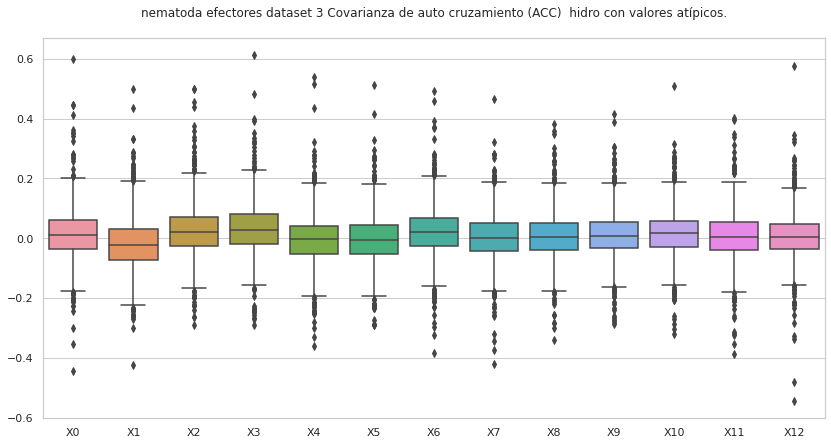

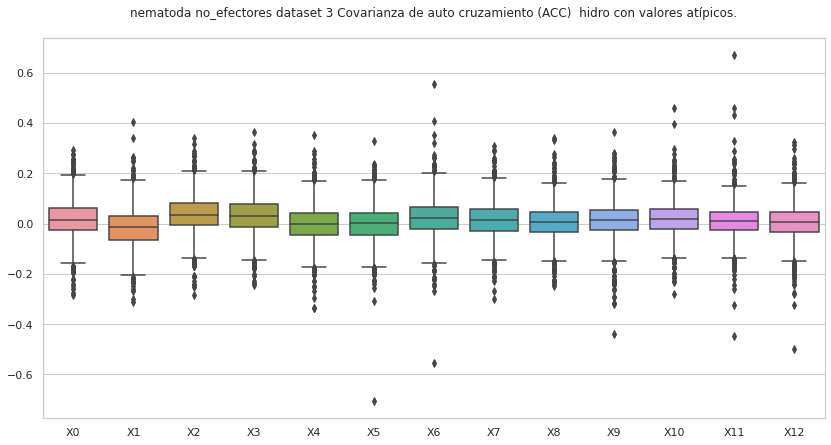

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores nematoda dataset 3, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.022621 -0.054573 -0.024733  0.021480  0.041785  0.119181 -0.028403   
1    0.109106  0.006863  0.093888  0.135450  0.091751 -0.033773  0.073244   
2   -0.078946 -0.071251 -0.036030  0.100100 -0.010995  0.006796  0.020599   
3   -0.007631 -0.064787  0.074098 -0.121072 -0.165068  0.017188 -0.160806   
4   -0.092814 -0.009529 -0.091094  0.101692 -0.070141 -0.100347  0.101009   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.058663 -0.053529  0.021721 -0.047356 -0.104359 -0.005383 -0.063202   
995 -0.130955 -0.046789 -0.076787  0.032969 -0.018424 -0.070920  0.112522   
997  0.023002 -0.071761  0.017088  0.054920  0.083202 -0.062007  0.037778   
998  0.121520 -0.007196  0.029746  0.033286 -0.111176 -0.054503 -0.054766   
999 -0.012251 -0.176094  

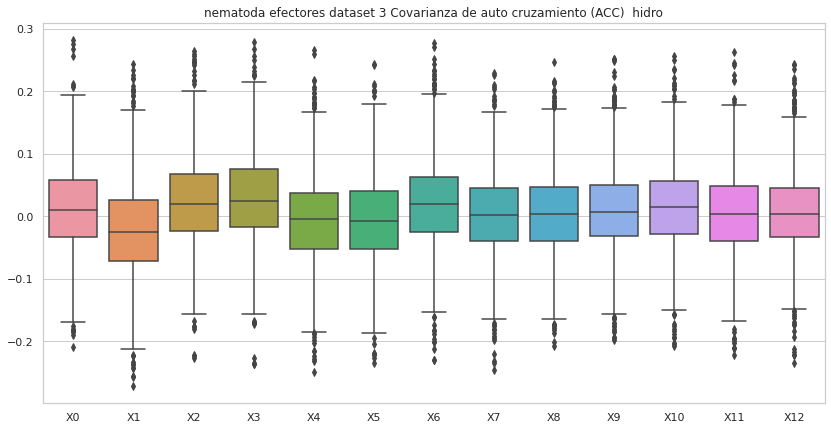

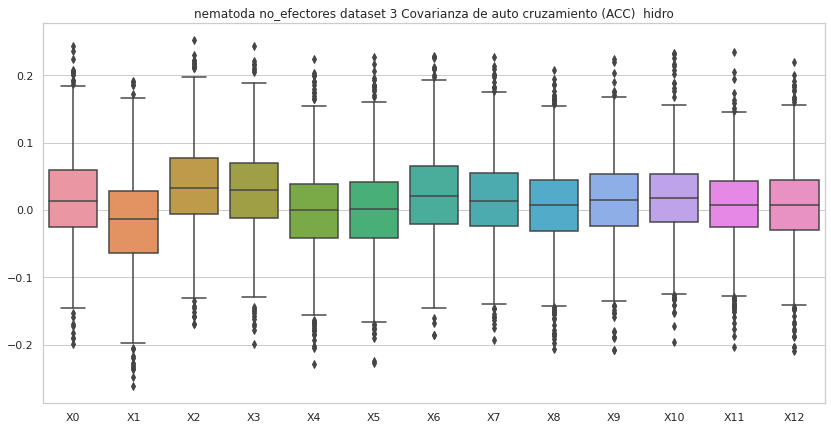

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))